# Nouvelle approche par motifs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Approche

**Explication des differente matrice a notre disposition** :
- 1 matrice exprimant quel gènes sont exprimés (negativement : -1, positivement : 1) significativement pour chaque condition.

In [2]:
complete_data = pd.read_csv("data/expression_final.csv", index_col=0)
complete_data.head()

,1101,1104,29,30,1977,1973,1980,1976,1978,1974,...,1563,796,797,799,800,798,801,1296,1677,1672
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AT1G01030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0


- 1 matrice bouléenne présentant la présence ou non de plm pour chaque gène

In [3]:
PLM_final = pd.read_csv("data/PLM_final.csv", index_col=0)

PLM_final = pd.DataFrame(np.where(PLM_final == 1, True, False), index=PLM_final.index, columns=PLM_final.columns)

PLM_final.head()

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True


## Tranformation de matrice

Ajout de label aux conditions de la matrice d'expression

In [4]:
Info_allswap = pd.read_table("data/Info-allswap.txt")
Info_allswap["uniq_name"] = Info_allswap[['StressName', 'swap_name']].agg('__'.join, axis=1)

replace_col = {str(k): Info_allswap[Info_allswap["swap_id"] == k]["uniq_name"].values.tolist()[0] for k in Info_allswap["swap_id"]}

complete_data = complete_data.rename(replace_col, axis=1)

On va séparer la matrice d'expression des gènes en separant l'expression significative positive et négative des gène.

In [5]:
plus_data = np.where(complete_data == 1, True, False)
plus_data = pd.DataFrame(plus_data, index=complete_data.index, columns=complete_data.columns)
plus_data.head()

,DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,DROUGHT__Col0_stress / Col0,DROUGHT__35S_HAHB4_stress / 35S_HAHB4,DROUGHT__Col0_M_1 / Col0_control_1,DROUGHT__Col0_M_2 / Col0_control_2,DROUGHT__W498_M_1 / Col0_M_1,DROUGHT__W498_M_2 / Col0_M_2,DROUGHT__W498_M_1 / W498_control_1,DROUGHT__W498_M_2 / W498_control_2,...,VIRUS__LMV_Bl1_2 / Bl1_Control_2,VIRUS__CaMV_Col0 / Col0_Control,VIRUS__CaMV_dcl2_dcl3 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,VIRUS__TCV_G1_Col0_2 / G1_Col0_2,VIRUS__TCV_G11_Col0_1 / G11_Col0_1,VIRUS__TCV_G11_dcl2_dcl3_dcl4_1 / G11_dcl2_dcl3_dcl4_1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
AT1G01030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
minus_data = np.where(complete_data == -1, True, False)
minus_data = pd.DataFrame(minus_data, index=complete_data.index, columns=complete_data.columns)
minus_data.head()

,DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,DROUGHT__Col0_stress / Col0,DROUGHT__35S_HAHB4_stress / 35S_HAHB4,DROUGHT__Col0_M_1 / Col0_control_1,DROUGHT__Col0_M_2 / Col0_control_2,DROUGHT__W498_M_1 / Col0_M_1,DROUGHT__W498_M_2 / Col0_M_2,DROUGHT__W498_M_1 / W498_control_1,DROUGHT__W498_M_2 / W498_control_2,...,VIRUS__LMV_Bl1_2 / Bl1_Control_2,VIRUS__CaMV_Col0 / Col0_Control,VIRUS__CaMV_dcl2_dcl3 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,VIRUS__TCV_G1_Col0_2 / G1_Col0_2,VIRUS__TCV_G11_Col0_1 / G11_Col0_1,VIRUS__TCV_G11_dcl2_dcl3_dcl4_1 / G11_dcl2_dcl3_dcl4_1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True


## Extraction d'une matrice de presence de PLM par condition

Pour permettre de faire le lien entre la matrice d'expression des gène (positive ou negative) et la matrice de presence de presence de PLM par gene, voici la demarche :
- On prend la liste des genes exprimé significativement pour une condition donnée
- On filtre la matrice de presence par cette liste de gène
- On renvoie cette matrice de presence de PLM pour cette condition (donc sur sa population de gène)

In [7]:
# Creation de sa fonction associé
def cond_PLM_Pres_creat(stress, data):
    list = data[data[stress]][stress].index
    
    return PLM_final[PLM_final.index.isin(list)]

In [8]:
cond_PLM_Pres_creat("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data).head()

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G02816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G03870,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
AT1G09970,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
AT1G10020,False,False,False,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
AT1G16850,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


### Verification des conditions (conditions sans PLM)

In [9]:
cond = plus_data.columns
cond_no_PLM = []
len_trans = []

for c in cond:
    data = cond_PLM_Pres_creat(c, plus_data)
    if data.empty :
        cond_no_PLM.append(c)
    len_trans.append(data.shape[0])

cond_no_PLM

['TEMPERATURE__Fb1_4Celsius_2h / Col0_4Celsius_2h',
 'BIOTROPHIC.BACTERIA__fls2KO_flg22_30min / fls2KO_flg22_20min',
 'BIOTROPHIC.BACTERIA__fls2KO_flg22_60min / fls2KO_flg22_30min',
 'VIRUS__TEV_leaf_sys_1 / Control_leaf_sys_1',
 'VIRUS__TEV_leaf_sys_2 / Control_leaf_sys_2']

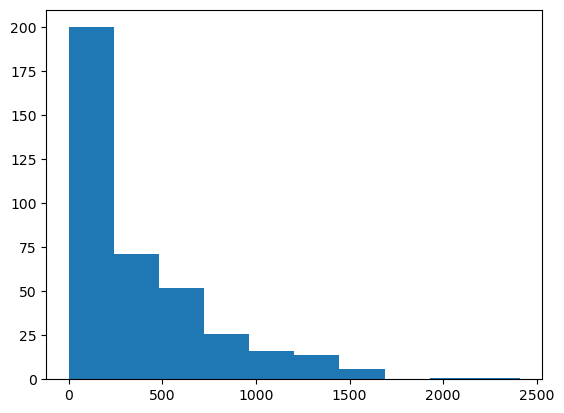

In [10]:
plt.figure()
plt.hist(len_trans)
plt.show()

Que faire ?
- On les retire si l'absence de PLM n'est pas importante (pour absolue)
- On les garde et les fixes a 0 (pour brut)

## Application d'une recherche de motifs significant

Ce que l'on souhaite faire  
=> Extraire des motifs de plm d'une condition, tels que la proportion du PLM dans la condition regarder est differente de celle de la population general

**Principe de l'utilité** :
Prenons f_C(PLM), la fréquence du PLM dans une condition particulière (nombre de fois présent dans les gène de la condition / nombre de gène de la condition)
Prenons f(PLM), la fréquence du PLM peu importe la condition (nombre de fois présent dans les gène / nombre de gène)

On fait *f_C(PLM) - f(PLM)* 

On va voir a quoi ressemble ces données

Restriction (ou non) au niveau des algorithme et impact sur l'utilité :
- Valeurs brut : **Prendre en compte impact d'absence et présence de PLM**
- Valeurs absolue : **Prendre en compte impact seulement la présence de PLM**
    - Prendre l'absolue
- Valeurs entière : **Prendre en compte impact d'absence et présence de PLM** + pour algo entier
    - Troncage des valeurs a 10^-4 
    - Accentuer les écarts entre les valeurs => Prendre l'écart entre les valeurs qui est la plus faible et pour chaque transaction regarder combien de fois elle se repete 
- Valeurs positive et entiere : **Prendre en compte impact seulement la présence de PLM** + pour algo entier

On va regarder, pour le troncage, où pourrait-il etre effectuer et si c'est possible  
Pour chaque condition on va regarder jusqu'a ou il y a la decimale.

### Help Function

num_zeroes_after_point => Compté le nombre de zero derriere la virgule

In [11]:
def num_zeroes_after_point(x):
    str_x = f"{x:.10f}"
    if '.' not in str_x:
        return 0
    fractional_part = str_x.split('.')[1]
    
    count = 0
    for char in fractional_part:
        if char == '0':
            count += 1
        else:
            break

    return count

flatten_chain => Transformé une matrix en list

In [12]:
def flatten_chain(matrix):
    res = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            res.append(matrix[i,j])
    return res

### Test sur valeur brut

In [13]:
cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [14]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,0.001833
std,0.039829
min,-0.994243
25%,-0.005479
50%,-0.000511
75%,0.008067
max,0.640171


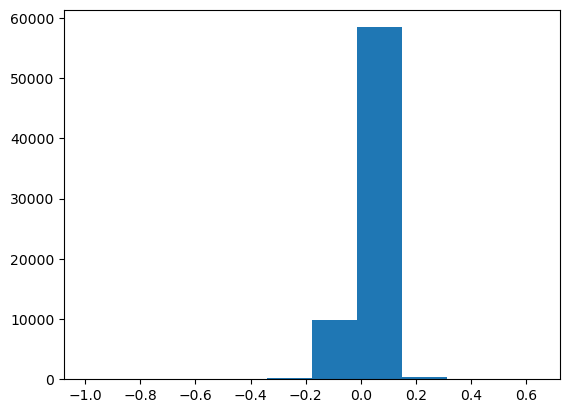

In [15]:
plt.figure()
plt.hist(value_all)
plt.show()

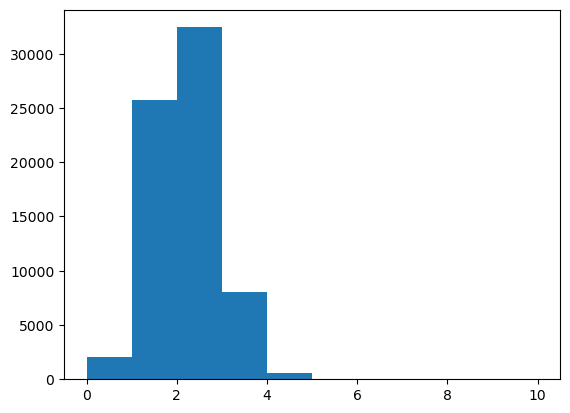

In [16]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

### Test sur valeur absolue

In [17]:
cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        continue
    utility = np.abs((PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0]))
    
    for u in utility.index:
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

zeros_count_all = {k:v for k,v in zeros_count_all.items() if v}
value_all = {k:v for k,v in value_all.items() if v}

In [18]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
pd.DataFrame(value_all).describe()

,0
count,67996.000000
mean,0.017495
std,0.030415
min,0.000000
25%,0.002287
50%,0.006525
75%,0.019408
max,0.640171


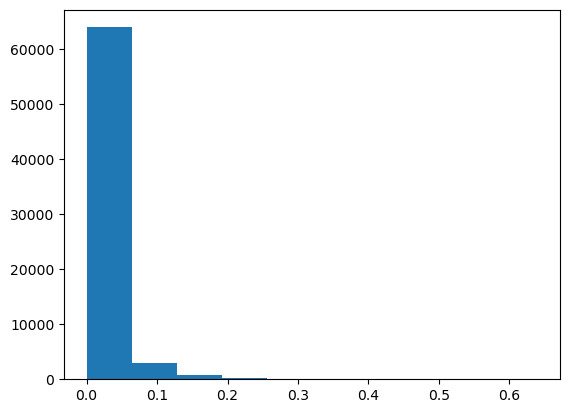

In [19]:
plt.figure()
plt.hist(value_all)
plt.show()

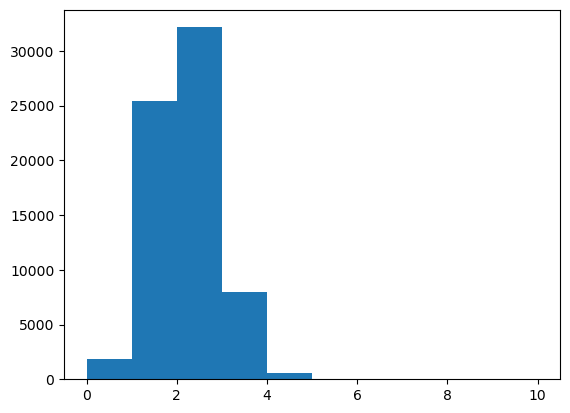

In [20]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

### Test sur valeur entiere

#### Quel valeur de tronc

In [21]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        utility[u] = round(utility[u], 4) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [22]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,68581.000000
mean,0.001842
std,0.039917
min,-0.994200
25%,-0.005500
50%,-0.000600
75%,0.008100
max,0.640200


In [23]:
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,0.001834
std,0.039829
min,-0.994200
25%,-0.005500
50%,-0.000500
75%,0.008100
max,0.640200


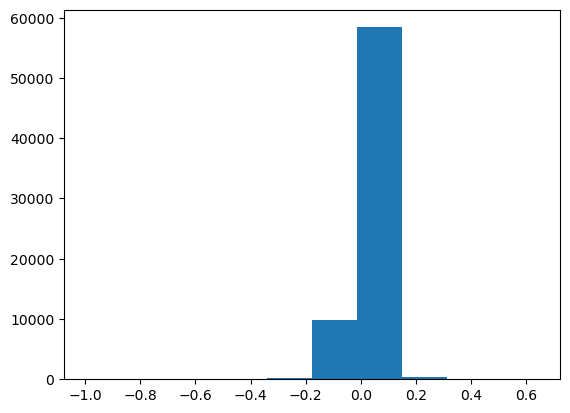

In [24]:
plt.figure()
plt.hist(value_all)
plt.show()

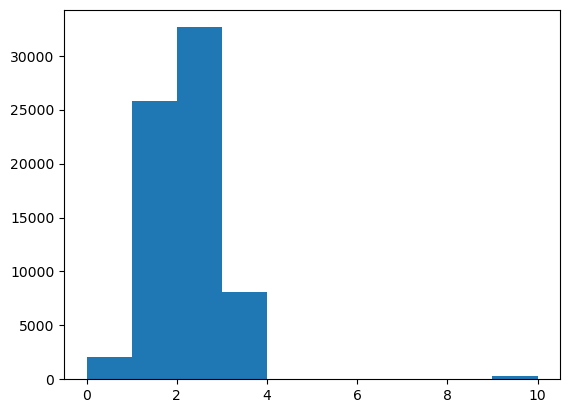

In [25]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

On décide d'effectuer le troncage a 10^-4

#### Valeur entiere

In [26]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [27]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,68581.000000
mean,18.421020
std,399.140908
min,-9942.000000
25%,-55.000000
50%,-5.000000
75%,81.000000
max,6402.000000


In [28]:
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,18.339459
std,398.258174
min,-9942.000000
25%,-55.000000
50%,-5.000000
75%,81.000000
max,6402.000000


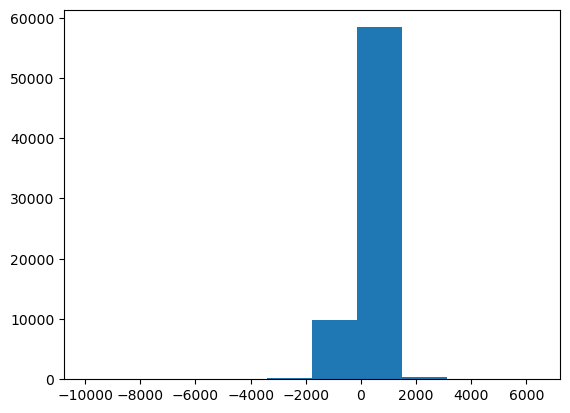

In [29]:
plt.figure()
plt.hist(value_all)
plt.show()

### Test sur valeur absolue entiere

On décide d'effectuer le troncage a 10^-4

In [30]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        continue
    utility = np.abs((PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0]))
    
    for u in utility.index:
        utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

zeros_count_all = {k:v for k,v in zeros_count_all.items() if v}
value_all = {k:v for k,v in value_all.items() if v}

In [31]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,67691.000000
mean,175.650943
std,304.620894
min,1.000000
25%,23.000000
50%,66.000000
75%,195.000000
max,6402.000000


In [32]:
pd.DataFrame(value_all).describe()

,0
count,67996.000000
mean,174.863051
std,304.163486
min,0.000000
25%,23.000000
50%,65.000000
75%,194.000000
max,6402.000000


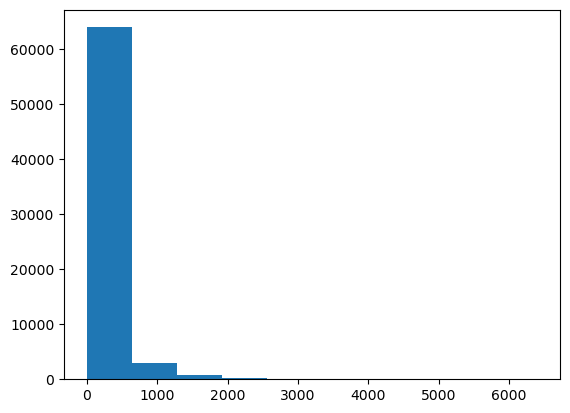

In [33]:
plt.figure()
plt.hist(value_all)
plt.show()

### Les Algo

https://data-mining.philippe-fournier-viger.com/key-papers-about-high-utility-itemset-mining/

- Brut =>
- Absolue => FHM float (from Philippe Fournier Vigier)
- Entier => FHN however for it negative U < positive U   => We want N U == P U but to distinguish :
    - **Separating data between col with N U and P U** => 
    - Decomposing the final utility of PLM by when it has N U and when it has P U
- Absolue & Entier => EFIM // **CHUI-Miner** (generators of maximal high utility itemsets = NO superset with frequent ones) // FHM+ (length restreint) // Bond measure (favorise PLM appearing only together)

In [37]:
plus_data.sum(axis = 1).describe()

count    10769.000000
mean        13.507289
std         15.135009
min          0.000000
25%          3.000000
50%          9.000000
75%         19.000000
max        116.000000
dtype: float64

In [ ]:
from math import trunc

def input_algo_create(stress, data, abso = True, tronc = True):
    list = data[data[stress]][stress].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    
    trad_list = pd.DataFrame([[i, PLM_1.columns[i]] for i in range(len(PLM_1.columns))])
    if abso :
        if PLM_1.empty :
            return print("no PLM")
        utility = np.abs(PLM_1.sum(axis=0) / PLM_1.shape[0] - PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        if PLM_1.empty :
            utility = 0 - PLM_final.sum(axis=0) / PLM_final.shape[0]
        utility = PLM_1.sum(axis=0) / PLM_1.shape[0] - PLM_final.sum(axis=0) / PLM_final.shape[0]
    
    if tronc == True:
        for u in utility.index:
            utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        utility = utility.astype(int)
    else :
        for u in utility.index:
            utility[u] = round(utility[u], 4)
    
    if abso :
    
        res = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
        for T in range(len(PLM_1.index)):
            PLM_line = PLM_1.iloc[T,:]
            col_trans = trad_list[PLM_line.values]
            col_trans = col_trans.set_index(1)
        
            res["trans"].append(" ".join(str(e) for e in col_trans[0].values))
            res["utility_trans"].append(" ".join(str(e) for e in utility[PLM_line].values))
            res["utility_trans_tot"].append(sum(utility[PLM_line].values))
    
        return trad_list, res
    
    else :
        res_pos = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
        res_neg = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
        
        for T in range(len(PLM_1.index)):
            PLM_line_pos = PLM_1.iloc[T,:][utility[utility > 0.0].index]
            PLM_line_neg = PLM_1.iloc[T,:][utility[utility < 0.0].index]
            
            col_trans_pos = trad_list[trad_list[1].isin(PLM_line_pos.index)][PLM_line_pos.values]
            col_trans_pos = col_trans_pos.set_index(1)
            
            col_trans_neg = trad_list[trad_list[1].isin(PLM_line_neg.index)][PLM_line_neg.values]
            col_trans_neg = col_trans_neg.set_index(1)
            
            res_pos["trans"].append(" ".join(str(e) for e in col_trans_pos[0].values))
            res_pos["utility_trans"].append(" ".join(str(e) for e in utility[PLM_line_pos.index][PLM_line_pos.values].values))
            res_pos["utility_trans_tot"].append(utility[PLM_line_pos.index][PLM_line_pos.values].values.sum())
            
            res_neg["trans"].append(" ".join(str(e) for e in col_trans_neg[0].values))
            res_neg["utility_trans"].append(" ".join(str(e) for e in abs(utility[PLM_line_neg.index][PLM_line_neg.values].values)))
            res_neg["utility_trans_tot"].append(abs(utility[PLM_line_neg.index][PLM_line_neg.values].values.sum()))
        
        return trad_list, res_pos, res_neg

### (Brut)

In [166]:
trad, res_pos, res_neg = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = False, tronc = False)
res_pos = pd.DataFrame(res_pos)
res_neg = pd.DataFrame(res_neg)

In [167]:
res_pos

,trans,utility_trans_tot,utility_trans
0,17 40 42 47 48 53 55 56 57 59 60 62 68 74 79 8...,1.313121,0.047636735072894454 0.06175132324264091 0.040...
1,9 68 74 148 162 176,0.424181,0.010678800260005561 0.16138917262512764 0.111...
2,9 17 20 68 114 117 118 176,0.452781,0.010678800260005561 0.047636735072894454 0.02...
3,9 20 33 120 130 137 140 164 176,0.214412,0.010678800260005561 0.021821896183489647 0.00...
4,9 17 40 42 47 48 53 55 56 59 60 68 74 86 100 1...,1.196211,0.010678800260005561 0.047636735072894454 0.06...
...,...,...,...
84,17 18 20 68 74,0.348407,0.047636735072894454 0.006407280156003343 0.02...
85,9 17 68 148,0.241898,0.010678800260005561 0.047636735072894454 0.16...
86,9 17 23 37 43 47 53 54 55 56 57 58 59 60 62 64...,1.460953,0.010678800260005561 0.047636735072894454 0.00...
87,120 137 138 139 140 141 142 143 145 146 176,0.344507,0.0048286749001764245 0.03194354164732101 0.00...


In [168]:
res_neg

,trans,utility_trans_tot,utility_trans
0,11 41 126 147 152 166 167,0.252855,0.04865818553254708 0.10455938341535889 0.0286...
1,41 88 119 147 152 166,0.168725,0.10455938341535889 0.0003714365307828024 0.02...
2,11 122 123 135 147 166,0.111710,0.04865818553254708 0.006314421023307641 0.007...
3,4 7 11 116 124 147 152 157 166 168,0.269106,0.02247191011235955 0.03454359736280063 0.0486...
4,21 99 102 126 152 166,0.120531,0.04160089144767387 0.024050515368186462 0.015...
...,...,...,...
84,11 21 119 166 167,0.154610,0.04865818553254708 0.04160089144767387 0.0258...
85,11 21 113 116 126 158 166,0.239669,0.04865818553254708 0.04160089144767387 0.0319...
86,11 70 97 116 147 152 158 166,0.175597,0.04865818553254708 0.0024143374500882157 0.00...
87,11 41 52 63 119 135 147 152 157 166 167 168 17...,0.551955,0.04865818553254708 0.10455938341535889 0.0667...


In [169]:
res_pos["utility_trans_tot"].describe()

count    89.000000
mean      0.560862
std       0.410751
min       0.017736
25%       0.277092
50%       0.406444
75%       0.763302
max       2.119324
Name: utility_trans_tot, dtype: float64

In [170]:
res_neg["utility_trans_tot"].describe()

count    89.000000
mean      0.180341
std       0.099691
min       0.017179
25%       0.120067
50%       0.164082
75%       0.217569
max       0.575077
Name: utility_trans_tot, dtype: float64

In [171]:
res_pos.to_csv('input_brut_pos.txt', sep=':', index=False, header = False)
res_neg.to_csv('input_brut_neg.txt', sep=':', index=False, header = False)

Lancer le script " " sur Eclipse (en changeant l'url de l'input)

### (Absolue)

In [ ]:
trad, res_abs = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = True, tronc = False)
res_abs = pd.DataFrame(res_abs)
res_abs

,trans,utility_trans_tot,utility_trans
0,11 17 40 41 42 47 48 53 55 56 57 59 60 62 68 7...,1.567,0.049 0.048 0.062 0.105 0.041 0.075 0.029 0.09...
1,9 41 68 74 88 119 147 148 152 162 166 176,0.592,0.011 0.105 0.161 0.111 0.0 0.026 0.027 0.022 ...
2,9 11 17 20 68 114 117 118 122 123 135 147 166 176,0.565,0.011 0.049 0.048 0.022 0.161 0.095 0.022 0.01...
3,4 7 9 11 20 33 116 120 124 130 137 140 147 152...,0.484,0.022 0.035 0.011 0.049 0.022 0.007 0.06 0.005...
4,9 17 21 40 42 47 48 53 55 56 59 60 68 74 86 99...,1.317,0.011 0.048 0.042 0.062 0.041 0.075 0.029 0.09...
...,...,...,...
84,11 17 18 20 21 68 74 119 166 167,0.503,0.049 0.048 0.006 0.022 0.042 0.161 0.111 0.02...
85,9 11 17 21 68 113 116 126 148 158 166,0.482,0.011 0.049 0.048 0.042 0.161 0.032 0.06 0.029...
86,9 11 17 23 37 43 47 53 54 55 56 57 58 59 60 62...,1.636,0.011 0.049 0.048 0.008 0.064 0.036 0.075 0.09...
87,11 41 52 63 119 120 135 137 138 139 140 141 14...,0.897,0.049 0.105 0.067 0.107 0.026 0.005 0.017 0.03...


In [182]:
res_abs["utility_trans_tot"].describe()

count    89.000000
mean      0.741342
std       0.392623
min       0.182300
25%       0.480000
50%       0.610000
75%       0.893300
max       2.199500
Name: utility_trans_tot, dtype: float64

In [94]:
res_abs.to_csv('input_abs.txt', sep=':', index=False, header = False)

Lancer le script " " sur Eclipse (en changeant l'url de l'input)

### (Entier)

In [163]:
trad, res_int_pos, res_int_neg = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = False, tronc = True)
res_int_pos = pd.DataFrame(res_int_pos)
res_int_neg = pd.DataFrame(res_int_neg)

In [164]:
res_int_pos

,trans,utility_trans_tot,utility_trans
0,17 40 42 47 48 53 55 56 57 59 60 62 68 74 79 8...,13131,476 618 406 752 287 988 835 1149 712 751 708 2...
1,9 68 74 148 162 176,4242,107 1613 1112 222 402 786
2,9 17 20 68 114 117 118 176,4526,107 476 218 1613 950 214 162 786
3,9 20 33 120 130 137 140 164 176,2142,107 218 68 47 95 319 248 254 786
4,9 17 40 42 47 48 53 55 56 59 60 68 74 86 100 1...,11963,107 476 618 406 752 287 988 835 1149 751 708 1...
...,...,...,...
84,17 18 20 68 74,3483,476 64 218 1613 1112
85,9 17 68 148,2418,107 476 1613 222
86,9 17 23 37 43 47 53 54 55 56 57 58 59 60 62 64...,14609,107 476 75 637 358 752 988 59 835 1149 712 51 ...
87,120 137 138 139 140 141 142 143 145 146 176,3443,47 319 59 350 248 698 54 245 238 399 786


In [165]:
res_int_neg

,trans,utility_trans_tot,utility_trans
0,11 41 126 147 152 166 167,2530,487 1046 286 271 54 55 331
1,41 88 119 147 152 166,1688,1046 4 258 271 54 55
2,11 122 123 135 147 166,1117,487 63 73 168 271 55
3,4 7 11 116 124 147 152 157 166 168,2692,225 345 487 600 457 271 54 144 55 54
4,21 99 102 126 152 166,1206,416 241 154 286 54 55
...,...,...,...
84,11 21 119 166 167,1547,487 416 258 55 331
85,11 21 113 116 126 158 166,2397,487 416 319 600 286 234 55
86,11 70 97 116 147 152 158 166,1756,487 23 32 600 271 54 234 55
87,11 41 52 63 119 135 147 152 157 166 167 168 17...,5522,487 1046 668 1072 258 168 271 54 144 55 331 54...


In [98]:
res_int_pos["utility_trans_tot"].describe()

count       89.000000
mean      5608.426966
std       4107.794846
min        178.000000
25%       2770.000000
50%       4066.000000
75%       7631.000000
max      21191.000000
Name: utility_trans_tot, dtype: float64

In [99]:
res_int_neg["utility_trans_tot"].describe()

count      89.000000
mean     1803.842697
std       997.071176
min       172.000000
25%      1201.000000
50%      1641.000000
75%      2176.000000
max      5751.000000
Name: utility_trans_tot, dtype: float64

In [100]:
res_int_pos.to_csv('input_int_pos.txt', sep=':', index=False, header = False)
res_int_neg.to_csv('input_int_neg.txt', sep=':', index=False, header = False)

Lancer le script " " sur Eclipse (en changeant l'url de l'input)

### (Absolue & Entier)

In [173]:
trad, res_absint = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = True, tronc = True)
res_absint = pd.DataFrame(res_absint)
res_absint

,trans,utility_trans_tot,utility_trans
0,11 17 40 41 42 47 48 53 55 56 57 59 60 62 68 7...,15661,487 476 618 1046 406 752 287 988 835 1149 712 ...
1,9 41 68 74 88 119 147 148 152 162 166 176,5930,107 1046 1613 1112 4 258 271 222 54 402 55 786
2,9 11 17 20 68 114 117 118 122 123 135 147 166 176,5643,107 487 476 218 1613 950 214 162 63 73 168 271...
3,4 7 9 11 20 33 116 120 124 130 137 140 147 152...,4834,225 345 107 487 218 68 600 47 457 95 319 248 2...
4,9 17 21 40 42 47 48 53 55 56 59 60 68 74 86 99...,13169,107 476 416 618 406 752 287 988 835 1149 751 7...
...,...,...,...
84,11 17 18 20 21 68 74 119 166 167,5030,487 476 64 218 416 1613 1112 258 55 331
85,9 11 17 21 68 113 116 126 148 158 166,4815,107 487 476 416 1613 319 600 286 222 234 55
86,9 11 17 23 37 43 47 53 54 55 56 57 58 59 60 62...,16365,107 487 476 75 637 358 752 988 59 835 1149 712...
87,11 41 52 63 119 120 135 137 138 139 140 141 14...,8965,487 1046 668 1072 258 47 168 319 59 350 248 69...


In [174]:
res_absint["utility_trans_tot"].describe()

count       89.000000
mean      7412.269663
std       3925.869391
min       1823.000000
25%       4800.000000
50%       6099.000000
75%       8930.000000
max      21991.000000
Name: utility_trans_tot, dtype: float64

In [175]:
res_absint.to_csv('input_absint.txt', sep=':', index=False, header = False)

Script to create an input text files for each condition

In [180]:
cond = plus_data.columns
trad_list_cond = pd.DataFrame([[i, plus_data.columns[i]] for i in range(len(plus_data.columns))])
trad_list_cond = trad_list_cond.set_index(1)

for c in cond:
    for absol, tronca, name_file in zip([False, True, True], 
                                        [True, False, True], 
                                        [["input_int_pos", "input_int_neg"], "input_abs", "input_absint"]):
        if absol :
            trad, res = input_algo_create(c, plus_data, abso = absol, tronc = tronca)
            res = pd.DataFrame(res)
            name =  "input/" + name_file + '_' + str(trad_list_cond.loc[c].values[0]) + ".txt"
            res.to_csv(name, sep=':', index=False, header = False)
        else :
            trad, res_pos, res_neg = input_algo_create(c, plus_data, abso = absol, tronc = tronca)
            res_pos = pd.DataFrame(res_pos)
            res_neg = pd.DataFrame(res_neg)
            name_pos = "input/" + name_file[0] + '_' + str(trad_list_cond.loc[c].values[0]) + ".txt"
            name_neg = "input/" + name_file[1] + '_' + str(trad_list_cond.loc[c].values[0]) + ".txt"
            res_pos.to_csv(name_pos, sep=':', index=False, header = False)
            res_neg.to_csv(name_neg, sep=':', index=False, header = False)

KeyboardInterrupt: 

Lancer le script "MainTestULBMiner.java" sur Eclipse (en changeant l'url de l'input)

In [194]:
output_abs_0 = pd.read_csv("output/output_abs_0.txt", sep="#", index_col=False, header=None)
output_absint_0 = pd.read_csv("output/output_absint_0.txt", sep="#", index_col=False, header=None)
output_int_pos_0 = pd.read_csv("output/output_int_pos_0.txt", sep="#", index_col=False, header=None)
output_int_neg_0 = pd.read_csv("output/output_int_neg_0.txt", sep="#", index_col=False, header=None)

In [191]:
output_abs_0

,0,1
0,38 42 79 40 66 86 37 57 47 59 60 55 89 53 56 7...,UTIL: 2.494399
1,38 42 79 40 66 86 37 57 47 59 60 55 89 53 56 7...,UTIL: 2.505399
2,38 42 79 40 66 86 37 57 47 59 60 55 89 53 56 7...,UTIL: 2.4729993
3,38 42 79 40 66 86 37 57 47 59 60 55 89 53 56 7...,UTIL: 2.4839993
4,38 42 79 40 66 86 37 57 47 59 60 55 89 53 56 9...,UTIL: 2.2719996
...,...,...
1325859,74 166,UTIL: 5.4849005
1325860,9 68,UTIL: 7.7445025
1325861,9 68 166,UTIL: 7.9919972
1325862,68,UTIL: 10.168195


In [192]:
output_absint_0

,0,1,2
0,159 142 157 52 145 146 172 135 63 120 138 168 ...,SUP: 1,UTIL: 8965
1,61 153 177 40 127 62 60 167 55 147 53 11 56 74...,SUP: 1,UTIL: 9620
2,22 129 87 66 105 116 37 59 89 148 158 53 56 74...,SUP: 1,UTIL: 9915
3,31 80 95 49 73 75 105 114 60 167 89 158 147 53...,SUP: 1,UTIL: 12051
4,111 50 42 79 177 40 86 57 47 60 59 167 55 158 ...,SUP: 1,UTIL: 12771
...,...,...,...
136,148 11 166 152 21 74 9 68 56,SUP: 2,UTIL: 10430
137,158 166 147 11 9 21 17 68,SUP: 3,UTIL: 10977
138,158 166 147 11 9 21 68,SUP: 4,UTIL: 12732
139,158 166 147 176 9 21 74,SUP: 3,UTIL: 8943


In [193]:
output_int_pos_0

,0,1,2
0,107 9,SUP: 1,UTIL: 178
1,18 20 17 74 68,SUP: 1,UTIL: 3483
2,161 9 68 117,SUP: 1,UTIL: 2003
3,161 9 68 120 17,SUP: 1,UTIL: 2312
4,30 112 148 17 56 74 9 68,SUP: 1,UTIL: 4937
...,...,...,...
60,112 49 73 75 74 148 176 9,SUP: 1,UTIL: 3845
61,112 49 73 75 74 176 9 17 68,SUP: 1,UTIL: 5712
62,112 49 73 75 74 68,SUP: 2,UTIL: 8686
63,139 140 127 148 17,SUP: 1,UTIL: 1916


In [195]:
output_int_neg_0

,0,1,2
0,81 80 63 126 158 21 166,SUP: 1,UTIL: 2176
1,85 132 80 113 50 177 116 152 147 166,SUP: 1,UTIL: 2192
2,4 124 7 157 168 116 152 147 11 166,SUP: 1,UTIL: 2692
3,15 96 50 172 168 126 152 119 158 147 11 21 166,SUP: 1,UTIL: 3712
4,102 152 21 166 177 41 119 147,SUP: 1,UTIL: 2619
5,175 11 166 119,SUP: 2,UTIL: 2650
6,175 11 166 21,SUP: 2,UTIL: 2966
7,7 168 116 11 166 6 113 50 126 119 158 21,SUP: 1,UTIL: 3680
8,123 122 147 11 166 174 172 63 168 41 116 126 1...,SUP: 1,UTIL: 5751
9,6 126 166 125 172 41 167 152 119,SUP: 1,UTIL: 2811


NE PAS OUBLIER :
- Probleme dans le nombre de gene pris en compte = Si trop petit (donc peu de transaction alors l'approche n'amène a pas grand chose)

In [ ]:
% get-content input_1.txt | %{$_ -replace '"|]|\[',""} > input.txt
java -classpath two_phase AlgoTwoPhase.java
java -jar spmf.jar run PrefixSpan contextPrefixSpan.txt output.txt 50%